# Toronto - where to open an restaurant

## Recommendation where to open an restaurant in Toronto based on avarage income and number of restaurants in the neighborhood

#### Demographic data (neighborhoods population and avarage income) will be taken from Toronto Open Data database <br>
https://www.toronto.ca/city-government/data-research-maps/open-data/ <br>
in form of csv file from:<br>
https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/ef0239b1-832b-4d0b-a1f3-4153e53b189e?format=csv<br>
Coordinates will be also taken from Toronto Open Data database: 
https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/a083c865-6d60-4d1d-b6c6-b0c8a85f9c15?format=csv&projection=4326 <br>
According to Licence: <br>
You are free to: <br>
"Copy, modify, publish, translate, adapt, distribute or otherwise use the Information in any medium, mode or format for any lawful purpose."

Information about restaurants will be obtained using Foursquare API.


#### Install libraries (pandas etc.)

In [16]:
import pandas as pd
import numpy as np
import requests # library to handle requests

#### Firstly data from Toronto Open Data database will be loaded <br>
[https://www.toronto.ca/city-government/data-research-maps/open-data/](https://www.toronto.ca/city-government/data-research-maps/open-data/)

In [17]:
url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/ef0239b1-832b-4d0b-a1f3-4153e53b189e?format=csv'
toronto = pd.read_csv(url)
toronto.shape

(2383, 146)

#### Dataframe is quite huge, important data about neighborhoods income and population will be extracted

In [18]:
toronto2 = toronto.transpose()
toronto2 = toronto2.iloc[1:]
toronto2.columns = toronto2.loc['Characteristic']
toronto_pop = toronto2[['Neighbourhood Number', 'Population, 2016','Total income: Population with an amount', 'Total income: Average amount ($)']]
toronto_pop = toronto_pop.iloc[4:]
toronto_pop = toronto_pop.rename_axis('Neighborhood').reset_index()
toronto_pop

Characteristic,Neighborhood,Neighbourhood Number,"Population, 2016",Total income: Population with an amount,Total income: Average amount ($)
0,City of Toronto,NaN,"2,731,571","2,187,220","52,268"
1,Agincourt North,129,"29,113","23,505","30,414"
2,Agincourt South-Malvern West,128,"23,757","19,370","31,825"
3,Alderwood,20,"12,054","9,915","47,709"
4,Annex,95,"30,526","25,615","112,766"
...,...,...,...,...,...
136,Wychwood,94,"14,349","11,030","54,460"
137,Yonge-Eglinton,100,"11,817","9,555","89,330"
138,Yonge-St.Clair,97,"12,528","10,805","114,174"
139,York University Heights,27,"27,593","22,230","29,958"


#### Create new pandas with neighborhoods population and average income, calculate total income of each neighborhood

In [19]:
toronto_pop['Population'] = toronto_pop['Total income: Population with an amount'].str.replace(',', '').astype(int)
toronto_pop['Average income'] = toronto_pop['Total income: Average amount ($)'].str.replace(',', '').astype(int)
toronto_pop['Neighborhood Income'] = toronto_pop['Population'] * toronto_pop['Average income']
toronto_population = toronto_pop['Population'].to_list()[0] #iloc(0)
toronto_avg_income = toronto_pop['Average income'].to_list()[0] #iloc(0)
print('Toronto_population: ',toronto_population)
print('Toronto avg income: ',toronto_avg_income)
toronto_pop = toronto_pop.iloc[1:]
toronto_pop = toronto_pop.copy()
toronto_pop['Neighbourhood Number'] = toronto_pop['Neighbourhood Number'].astype(str).astype(int)
toronto_pop_income = toronto_pop[['Neighborhood', 'Neighbourhood Number', 'Population', 'Average income', 'Neighborhood Income']]
toronto_pop_income

Toronto_population:  2187220
Toronto avg income:  52268


Characteristic,Neighborhood,Neighbourhood Number,Population,Average income,Neighborhood Income
1,Agincourt North,129,23505,30414,714881070
2,Agincourt South-Malvern West,128,19370,31825,616450250
3,Alderwood,20,9915,47709,473034735
4,Annex,95,25615,112766,2888501090
5,Banbury-Don Mills,42,22335,67757,1513352595
...,...,...,...,...,...
136,Wychwood,94,11030,54460,600693800
137,Yonge-Eglinton,100,9555,89330,853548150
138,Yonge-St.Clair,97,10805,114174,1233650070
139,York University Heights,27,22230,29958,665966340


#### Load coordinates data

In [20]:
coord_url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/a083c865-6d60-4d1d-b6c6-b0c8a85f9c15?format=csv&projection=4326'
#coord_url = 'ftp://ftp.geogratis.gc.ca/pub/nrcan_rncan/vector/geobase_cgn_toponyme/prov_csv_eng/cgn_on_csv_eng.zip'
toronto_coord = pd.read_csv(coord_url)
toronto_coord

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,7141,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),NaN,NaN,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,7142,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),NaN,NaN,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,7143,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),NaN,NaN,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,7144,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),NaN,NaN,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,7145,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),NaN,NaN,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,7276,25886531,25926797,49885,124,124,Kennedy Park (124),Kennedy Park (124),NaN,NaN,-79.260382,43.725556,16493665,6.861056e+06,10530.202433,"{u'type': u'Polygon', u'coordinates': (((-79.2..."
136,7277,25886955,25926798,49885,78,78,Kensington-Chinatown (78),Kensington-Chinatown (78),NaN,NaN,-79.397240,43.653554,16493681,2.933586e+06,6945.056557,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
137,7278,25886737,25926799,49885,6,6,Kingsview Village-The Westway (6),Kingsview Village-The Westway (6),NaN,NaN,-79.547863,43.698993,16493697,9.694496e+06,14458.764271,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
138,7279,25886763,25926800,49885,15,15,Kingsway South (15),Kingsway South (15),NaN,NaN,-79.510577,43.653520,16493713,5.043477e+06,11140.672714,"{u'type': u'Polygon', u'coordinates': (((-79.5..."


#### Filter data in order to cover necessary information: Neighbourhood Number, Longitude, Latitude

In [21]:
toronto_coord = toronto_coord.rename(columns = {'AREA_SHORT_CODE': 'Neighbourhood Number', 'LONGITUDE': 'Longitude', 'LATITUDE': 'Latitude'})
toronto_coord_neigh = toronto_coord[['Neighbourhood Number', 'Longitude', 'Latitude']]
toronto_coord_neigh

,Neighbourhood Number,Longitude,Latitude
0,94,-79.425515,43.676919
1,100,-79.403590,43.704689
2,97,-79.397871,43.687859
3,27,-79.488883,43.765736
4,31,-79.457108,43.714672
...,...,...,...
135,124,-79.260382,43.725556
136,78,-79.397240,43.653554
137,6,-79.547863,43.698993
138,15,-79.510577,43.653520


#### Add coordinates to neighborhoods list

In [22]:
print(toronto_pop_income.head())
neighborhoods = pd.merge(toronto_pop_income, toronto_coord_neigh, on = 'Neighbourhood Number', how = 'left')
neighborhoods

Characteristic                  Neighborhood  Neighbourhood Number  \
1                            Agincourt North                   129   
2               Agincourt South-Malvern West                   128   
3                                  Alderwood                    20   
4                                      Annex                    95   
5                          Banbury-Don Mills                    42   

Characteristic  Population  Average income  Neighborhood Income  
1                    23505           30414            714881070  
2                    19370           31825            616450250  
3                     9915           47709            473034735  
4                    25615          112766           2888501090  
5                    22335           67757           1513352595  


,Neighborhood,Neighbourhood Number,Population,Average income,Neighborhood Income,Longitude,Latitude
0,Agincourt North,129,23505,30414,714881070,-79.266712,43.805441
1,Agincourt South-Malvern West,128,19370,31825,616450250,-79.265612,43.788658
2,Alderwood,20,9915,47709,473034735,-79.541611,43.604937
3,Annex,95,25615,112766,2888501090,-79.404001,43.671585
4,Banbury-Don Mills,42,22335,67757,1513352595,-79.349718,43.737657
...,...,...,...,...,...,...,...
135,Wychwood,94,11030,54460,600693800,-79.425515,43.676919
136,Yonge-Eglinton,100,9555,89330,853548150,-79.403590,43.704689
137,Yonge-St.Clair,97,10805,114174,1233650070,-79.397871,43.687859
138,York University Heights,27,22230,29958,665966340,-79.488883,43.765736


### Now data about population, income and location of each neighborhood is ready. Information about restaurants in neighborhood will be added and clustering performed.

#### Install libraries for coordinates, map rendering, plots, clustering

In [23]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# import Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

# import matplotlib for charts
import matplotlib as mpl
import matplotlib.pyplot as plt

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


#### Get Toronto coordinates

In [24]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


#### Display Toronto map with neighborhoods

In [25]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Foursquare API is used to explore the neighborhoods.

In [26]:
CLIENT_ID = 'Z5TJ1LAZXJH33UEABSSXCVPXDC3VICA3QP2HDYTZFXDDIZ' # your Foursquare ID
CLIENT_SECRET = '0KPPKFHHOPLPNP2QNQQEFK3ZPOY3IRASZDQCIVQOMKSCIZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#### Get the top venues (limited to 100) that are in every neighborhood within a radius of 700 meters.

In [27]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Run the above function on each neighborhood and create a new dataframe called toronto_venues

In [28]:
toronto_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )


Agincourt North
Agincourt South-Malvern West
Alderwood
Annex
Banbury-Don Mills
Bathurst Manor
Bay Street Corridor
Bayview Village
Bayview Woods-Steeles
Bedford Park-Nortown
Beechborough-Greenbrook
Bendale
Birchcliffe-Cliffside
Black Creek
Blake-Jones
Briar Hill-Belgravia
Bridle Path-Sunnybrook-York Mills
Broadview North
Brookhaven-Amesbury
Cabbagetown-South St. James Town
Caledonia-Fairbank
Casa Loma
Centennial Scarborough
Church-Yonge Corridor
Clairlea-Birchmount
Clanton Park
Cliffcrest
Corso Italia-Davenport
Danforth
Danforth East York
Don Valley Village
Dorset Park
Dovercourt-Wallace Emerson-Junction
Downsview-Roding-CFB
Dufferin Grove
East End-Danforth
Edenbridge-Humber Valley
Eglinton East
Elms-Old Rexdale
Englemount-Lawrence
Eringate-Centennial-West Deane
Etobicoke West Mall
Flemingdon Park
Forest Hill North
Forest Hill South
Glenfield-Jane Heights
Greenwood-Coxwell
Guildwood
Henry Farm
High Park North
High Park-Swansea
Highland Creek
Hillcrest Village
Humber Heights-Westmount
Hu

#### Let's check the size of the resulting dataframe

In [29]:
print(toronto_venues.shape)
toronto_venues.head(20)

(3605, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt North,43.805441,-79.266712,Menchie's,43.808338,-79.268288,Frozen Yogurt Shop
1,Agincourt North,43.805441,-79.266712,Saravanaa Bhavan South Indian Restaurant,43.810117,-79.269275,Indian Restaurant
2,Agincourt North,43.805441,-79.266712,Shoppers Drug Mart,43.808894,-79.269854,Pharmacy
3,Agincourt North,43.805441,-79.266712,Booster Juice,43.809915,-79.269382,Juice Bar
4,Agincourt North,43.805441,-79.266712,Dollarama,43.808894,-79.269854,Discount Store
5,Agincourt North,43.805441,-79.266712,Congee Town 太皇名粥,43.809035,-79.267634,Chinese Restaurant
6,Agincourt North,43.805441,-79.266712,Pizza Pizza,43.808318,-79.268537,Pizza Place
7,Agincourt North,43.805441,-79.266712,Subway,43.809372,-79.269474,Sandwich Place
8,Agincourt North,43.805441,-79.266712,Popeyes Louisiana Kitchen,43.808652,-79.267929,Fried Chicken Joint
9,Agincourt North,43.805441,-79.266712,TD Canada Trust,43.809828,-79.268764,Bank


#### Let's check how many venues with key word 'Restaurant' were returned for each neighborhood

In [30]:
toronto_venues.groupby('Neighborhood')['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

Neighborhood
Agincourt North                  7
Agincourt South-Malvern West    13
Alderwood                        0
Annex                           25
Banbury-Don Mills               13
                                ..
Wychwood                        21
Yonge-Eglinton                  29
Yonge-St.Clair                  20
York University Heights          3
Yorkdale-Glen Park              12
Name: Venue Category, Length: 140, dtype: int64

#### Interesting thing, there are neighborhoods without any restaurant nearby.

#### Add number of 'Restaurant' venues to neighborhoods dataframe

In [31]:
neighborhoods['Number_of_restaurants'] = toronto_venues.groupby('Neighborhood')['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count()).values
max_number_of_restaurants = neighborhoods['Number_of_restaurants'].max()
min_number_of_restaurants = neighborhoods['Number_of_restaurants'].min()
print("Min. and max. number of restaurants:", min_number_of_restaurants, max_number_of_restaurants)
neighborhoods

Min. and max. number of restaurants: 0 37


,Neighborhood,Neighbourhood Number,Population,Average income,Neighborhood Income,Longitude,Latitude,Number_of_restaurants
0,Agincourt North,129,23505,30414,714881070,-79.266712,43.805441,7
1,Agincourt South-Malvern West,128,19370,31825,616450250,-79.265612,43.788658,13
2,Alderwood,20,9915,47709,473034735,-79.541611,43.604937,0
3,Annex,95,25615,112766,2888501090,-79.404001,43.671585,25
4,Banbury-Don Mills,42,22335,67757,1513352595,-79.349718,43.737657,13
...,...,...,...,...,...,...,...,...
135,Wychwood,94,11030,54460,600693800,-79.425515,43.676919,21
136,Yonge-Eglinton,100,9555,89330,853548150,-79.403590,43.704689,29
137,Yonge-St.Clair,97,10805,114174,1233650070,-79.397871,43.687859,20
138,York University Heights,27,22230,29958,665966340,-79.488883,43.765736,3


### Let's perform clustering

#### Check how many clusters should be optimal

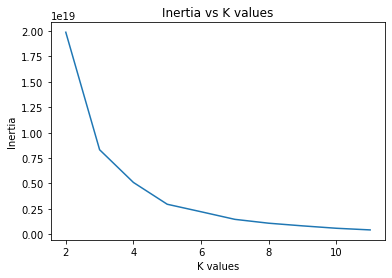

In [32]:
toronto_grouped_clustering = neighborhoods.drop('Neighborhood', 1)
# squared error
inertia = []
# run k-means clustering
for kclusters in range(2,12):
    kmeans = KMeans(n_clusters = kclusters, random_state=0)
    try:
        kmeans.fit(toronto_grouped_clustering)
    except:
        print("Error at n_clusters=", kclusters)
    # get squared error
    inertia.append(kmeans.inertia_)

#plot K values versus squared error
plt.plot(range(2,12), inertia)
plt.xlabel('K values')
plt.ylabel('Inertia')
plt.title('Inertia vs K values')
plt.show()

#### optimal K value is 5

#### Run k-means to cluster the neighborhood into 5 clusters.

In [33]:
kclusters  = 5
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(toronto_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 2, 1, 3, 0, 3, 0, 2, 1], dtype=int32)

#### Create a new dataframe that includes cluster labels.

In [34]:
# add clustering labels
neighborhoods_clusters = neighborhoods
neighborhoods_clusters.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_clusters.head()

,Cluster Labels,Neighborhood,Neighbourhood Number,Population,Average income,Neighborhood Income,Longitude,Latitude,Number_of_restaurants
0,0,Agincourt North,129,23505,30414,714881070,-79.266712,43.805441,7
1,0,Agincourt South-Malvern West,128,19370,31825,616450250,-79.265612,43.788658,13
2,2,Alderwood,20,9915,47709,473034735,-79.541611,43.604937,0
3,1,Annex,95,25615,112766,2888501090,-79.404001,43.671585,25
4,3,Banbury-Don Mills,42,22335,67757,1513352595,-79.349718,43.737657,13


#### Finally, let's visualize the resulting clusters

In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood'], neighborhoods['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine clusters

#### Firstly Calculate average neighborhood income and average number of restaurants per neighborhood in Toronto (in order to compare each cluster data versus whole town)

In [36]:
# there will be calculated and stored data about neighborhood income for each cluster
avg_cluster = []
min_cluster = []
max_cluster = []
# data about number of restaurants for each cluster
avg_nb_cluster = []
min_nb_cluster = []
max_nb_cluster = []
# Calculate average neighborhood income in Toronto
mean = round(neighborhoods["Neighborhood Income"].mean()/1000000, 1)
print("Average neighborhood income in Toronto [million CAD]: ", mean)
# Calculate average number of restaurants per neighborhood in Toronto
mean_nb = int(round(neighborhoods["Number_of_restaurants"].mean(), 0))
print("Average number of restaurants per neighborhood in Toronto: ", mean_nb)

Average neighborhood income in Toronto [million CAD]:  816.5
Average number of restaurants per neighborhood in Toronto:  6


#### Cluster 0 is marked by red circle on the map

In [37]:
neighborhoods_cluster_0 = neighborhoods_clusters.loc[neighborhoods_clusters['Cluster Labels'] == 0]
avg_inc_cluster_0 = round(neighborhoods_cluster_0["Neighborhood Income"].astype("float").mean(axis=0)/1000000, 1)
min_inc_cluster_0 = round(neighborhoods_cluster_0["Neighborhood Income"].astype("float").min(axis=0)/1000000, 1)
max_inc_cluster_0= round(neighborhoods_cluster_0["Neighborhood Income"].astype("float").max(axis=0)/1000000, 1)
print("max., average and min. neighborhood income for cluster 0:", max_inc_cluster_0, avg_inc_cluster_0, min_inc_cluster_0)
avg_cluster.append(avg_inc_cluster_0)
min_cluster.append(min_inc_cluster_0)
max_cluster.append(max_inc_cluster_0)
avg_nb_cluster_0 = int(round(neighborhoods_cluster_0["Number_of_restaurants"].mean(axis=0),0))
min_nb_cluster_0 = neighborhoods_cluster_0["Number_of_restaurants"].min(axis=0)
max_nb_cluster_0 = neighborhoods_cluster_0["Number_of_restaurants"].max(axis=0)
print("max., average and min. number of restaurants for cluster 0:", max_nb_cluster_0, avg_nb_cluster_0, min_nb_cluster_0)
avg_nb_cluster.append(avg_nb_cluster_0)
min_nb_cluster.append(min_nb_cluster_0)
max_nb_cluster.append(max_nb_cluster_0)
neighborhoods_cluster_0

max., average and min. neighborhood income for cluster 0: 991.7 713.1 555.0
max., average and min. number of restaurants for cluster 0: 34 7 0


,Cluster Labels,Neighborhood,Neighbourhood Number,Population,Average income,Neighborhood Income,Longitude,Latitude,Number_of_restaurants
0,0,Agincourt North,129,23505,30414,714881070,-79.266712,43.805441,7
1,0,Agincourt South-Malvern West,128,19370,31825,616450250,-79.265612,43.788658,13
5,0,Bathurst Manor,34,12715,45936,584076240,-79.456055,43.764813,0
7,0,Bayview Village,52,17695,52035,920759325,-79.377117,43.776361,0
11,0,Bendale,127,23175,33256,770707800,-79.257400,43.760366,0
12,0,Birchcliffe-Cliffside,122,17555,54360,954289800,-79.265093,43.694682,0
19,0,Cabbagetown-South St. James Town,71,9960,63012,627599520,-79.366107,43.667648,15
22,0,Centennial Scarborough,133,10695,54045,578011275,-79.150843,43.782376,0
24,0,Clairlea-Birchmount,120,20495,36232,742574840,-79.281382,43.713592,0
25,0,Clanton Park,33,13045,51181,667656145,-79.446303,43.741978,0


#### Cluster 1 is marked by violet circle on the map

In [38]:
neighborhoods_cluster_1 = neighborhoods_clusters.loc[neighborhoods_clusters['Cluster Labels'] == 1]
avg_inc_cluster_1 = round(neighborhoods_cluster_1["Neighborhood Income"].astype("float").mean(axis=0)/1000000, 1)
min_inc_cluster_1 = round(neighborhoods_cluster_1["Neighborhood Income"].astype("float").min(axis=0)/1000000, 1)
max_inc_cluster_1 = round(neighborhoods_cluster_1["Neighborhood Income"].astype("float").max(axis=0)/1000000, 1)
print("max., average and min. neighborhood income for cluster 1:", max_inc_cluster_1, avg_inc_cluster_1, min_inc_cluster_1)
avg_cluster.append(avg_inc_cluster_1)
min_cluster.append(min_inc_cluster_1)
max_cluster.append(max_inc_cluster_1)
avg_nb_cluster_1 = int(round(neighborhoods_cluster_1["Number_of_restaurants"].mean(axis=0),0))
min_nb_cluster_1 = neighborhoods_cluster_1["Number_of_restaurants"].min(axis=0)
max_nb_cluster_1 = neighborhoods_cluster_1["Number_of_restaurants"].max(axis=0)
print("max., average and min. number of restaurants for cluster 1:", max_nb_cluster_1, avg_nb_cluster_1, min_nb_cluster_1)
avg_nb_cluster.append(avg_nb_cluster_1)
min_nb_cluster.append(min_nb_cluster_1)
max_nb_cluster.append(max_nb_cluster_1)
neighborhoods_cluster_1

max., average and min. neighborhood income for cluster 1: 2888.5 2115.2 1851.9
max., average and min. number of restaurants for cluster 1: 25 8 1


,Cluster Labels,Neighborhood,Neighbourhood Number,Population,Average income,Neighborhood Income,Longitude,Latitude,Number_of_restaurants
3,1,Annex,95,25615,112766,2888501090,-79.404001,43.671585,25
9,1,Bedford Park-Nortown,39,17645,123077,2171693665,-79.420227,43.731486,12
16,1,Bridle Path-Sunnybrook-York Mills,41,7355,308010,2265413550,-79.378904,43.731013,1
44,1,Forest Hill South,101,9055,204521,1851937655,-79.414318,43.694526,2
58,1,Islington-City Centre West,14,36115,52787,1906402505,-79.543317,43.633463,11
69,1,Lawrence Park South,103,11705,169203,1980521115,-79.406039,43.717212,6
87,1,Niagara,82,27940,70623,1973206620,-79.412420,43.636681,5
129,1,Willowdale East,51,41570,45326,1884201820,-79.401484,43.770602,2


#### Cluster 2 is marked by light blue circle on the map

In [39]:
neighborhoods_cluster_2 = neighborhoods_clusters.loc[neighborhoods_clusters['Cluster Labels'] == 2]
avg_inc_cluster_2 = round(neighborhoods_cluster_2["Neighborhood Income"].astype("float").mean(axis=0)/1000000, 1)
min_inc_cluster_2 = round(neighborhoods_cluster_2["Neighborhood Income"].astype("float").min(axis=0)/1000000, 1)
max_inc_cluster_2 = round(neighborhoods_cluster_2["Neighborhood Income"].astype("float").max(axis=0)/1000000, 1)
print("max., average and min. neighborhood income for cluster 2:", max_inc_cluster_2, avg_inc_cluster_2, min_inc_cluster_2)
avg_cluster.append(avg_inc_cluster_2)
min_cluster.append(min_inc_cluster_2)
max_cluster.append(max_inc_cluster_2)
avg_nb_cluster_2 = int(round(neighborhoods_cluster_2["Number_of_restaurants"].mean(axis=0),0))
min_nb_cluster_2 = neighborhoods_cluster_2["Number_of_restaurants"].min(axis=0)
max_nb_cluster_2 = neighborhoods_cluster_2["Number_of_restaurants"].max(axis=0)
print("max., average and min. number of restaurants for cluster 2:", max_nb_cluster_2, avg_nb_cluster_2, min_nb_cluster_2)
avg_nb_cluster.append(avg_nb_cluster_2)
min_nb_cluster.append(min_nb_cluster_2)
max_nb_cluster.append(max_nb_cluster_2)
neighborhoods_cluster_2

max., average and min. neighborhood income for cluster 2: 548.0 387.4 166.3
max., average and min. number of restaurants for cluster 2: 22 5 0


,Cluster Labels,Neighborhood,Neighbourhood Number,Population,Average income,Neighborhood Income,Longitude,Latitude,Number_of_restaurants
2,2,Alderwood,20,9915,47709,473034735,-79.541611,43.604937,0
8,2,Bayview Woods-Steeles,49,10555,47246,498681530,-79.382118,43.796802,0
10,2,Beechborough-Greenbrook,112,4915,33829,166269535,-79.479473,43.693216,0
13,2,Black Creek,24,15770,25989,409846530,-79.521979,43.764890,1
14,2,Blake-Jones,69,5965,48511,289368115,-79.337394,43.676173,9
15,2,Briar Hill-Belgravia,108,11805,34768,410436240,-79.452851,43.699024,3
17,2,Broadview North,57,9500,44557,423291500,-79.355630,43.688825,4
18,2,Brookhaven-Amesbury,30,13510,32483,438845330,-79.485589,43.701326,3
20,2,Caledonia-Fairbank,109,8035,35112,282124920,-79.455212,43.688569,2
27,2,Corso Italia-Davenport,92,11745,41717,489966165,-79.447469,43.677661,14


#### Cluster 3 is marked by light green circle on the map

In [40]:
neighborhoods_cluster_3 = neighborhoods_clusters.loc[neighborhoods_clusters['Cluster Labels'] == 3]
avg_inc_cluster_3 = round(neighborhoods_cluster_3["Neighborhood Income"].astype("float").mean(axis=0)/1000000, 1)
min_inc_cluster_3 = round(neighborhoods_cluster_3["Neighborhood Income"].astype("float").min(axis=0)/1000000, 1)
max_inc_cluster_3 = round(neighborhoods_cluster_3["Neighborhood Income"].astype("float").max(axis=0)/1000000, 1)
print("max., average and min. neighborhood income for cluster 3:", max_inc_cluster_3, avg_inc_cluster_3, min_inc_cluster_3)
avg_cluster.append(avg_inc_cluster_3)
min_cluster.append(min_inc_cluster_3)
max_cluster.append(max_inc_cluster_3)
avg_nb_cluster_3 = int(round(neighborhoods_cluster_3["Number_of_restaurants"].mean(axis=0),0))
min_nb_cluster_3 = neighborhoods_cluster_3["Number_of_restaurants"].min(axis=0)
max_nb_cluster_3 = neighborhoods_cluster_3["Number_of_restaurants"].max(axis=0)
print("max., average and min. number of restaurants for cluster 3:", max_nb_cluster_3, avg_nb_cluster_3, min_nb_cluster_3)
avg_nb_cluster.append(avg_nb_cluster_3)
min_nb_cluster.append(min_nb_cluster_3)
max_nb_cluster.append(max_nb_cluster_3)
neighborhoods_cluster_3

max., average and min. neighborhood income for cluster 3: 1602.2 1325.2 1048.7
max., average and min. number of restaurants for cluster 3: 37 8 0


,Cluster Labels,Neighborhood,Neighbourhood Number,Population,Average income,Neighborhood Income,Longitude,Latitude,Number_of_restaurants
4,3,Banbury-Don Mills,42,22335,67757,1513352595,-79.349718,43.737657,13
6,3,Bay Street Corridor,76,22835,56526,1290771210,-79.385721,43.657511,22
21,3,Casa Loma,96,9365,165047,1545665155,-79.408007,43.681852,2
23,3,Church-Yonge Corridor,75,28370,53583,1520149710,-79.379017,43.659649,23
32,3,Dovercourt-Wallace Emerson-Junction,93,30700,39740,1220018000,-79.438541,43.665677,4
36,3,Edenbridge-Humber Valley,9,12510,101551,1270403010,-79.522458,43.670886,0
49,3,High Park North,88,18250,57465,1048736250,-79.466302,43.657565,3
50,3,High Park-Swansea,87,19200,71204,1367116800,-79.467872,43.645065,0
64,3,Kingsway South,15,7295,144642,1055163390,-79.510577,43.653520,8
66,3,L'Amoreaux,117,35395,31826,1126481270,-79.314084,43.795716,0


#### Cluster 4 is marked by orange circle on the map

In [41]:
neighborhoods_cluster_4 = neighborhoods_clusters.loc[neighborhoods_clusters['Cluster Labels'] == 4]
avg_inc_cluster_4 = round(neighborhoods_cluster_4["Neighborhood Income"].astype("float").mean(axis=0)/1000000, 1)
min_inc_cluster_4 = round(neighborhoods_cluster_4["Neighborhood Income"].astype("float").min(axis=0)/1000000, 1)
max_inc_cluster_4 = round(neighborhoods_cluster_4["Neighborhood Income"].astype("float").max(axis=0)/1000000, 1)
print("max., average and min. neighborhood income for cluster 4:", max_inc_cluster_4, avg_inc_cluster_4, min_inc_cluster_4)
avg_cluster.append(avg_inc_cluster_4)
min_cluster.append(min_inc_cluster_4)
max_cluster.append(max_inc_cluster_4)
avg_nb_cluster_4 = int(round(neighborhoods_cluster_4["Number_of_restaurants"].mean(axis=0),0))
min_nb_cluster_4 = neighborhoods_cluster_4["Number_of_restaurants"].min(axis=0)
max_nb_cluster_4 = neighborhoods_cluster_4["Number_of_restaurants"].max(axis=0)
print("max., average and min. number of restaurants for cluster 4:", max_nb_cluster_4, avg_nb_cluster_4, min_nb_cluster_4)
avg_nb_cluster.append(avg_nb_cluster_4)
min_nb_cluster.append(min_nb_cluster_4)
max_nb_cluster.append(max_nb_cluster_4)
neighborhoods_cluster_4

max., average and min. neighborhood income for cluster 4: 4279.8 3936.7 3593.6
max., average and min. number of restaurants for cluster 4: 3 2 0


,Cluster Labels,Neighborhood,Neighbourhood Number,Population,Average income,Neighborhood Income,Longitude,Latitude,Number_of_restaurants
104,4,Rosedale-Moore Park,98,17285,207903,3593603355,-79.379669,43.68282,0
122,4,Waterfront Communities-The Island,77,60620,70600,4279772000,-79.377202,43.63388,3


### Let's visualize data for all clusters

#### Let's check neighborhood income versus cluster number

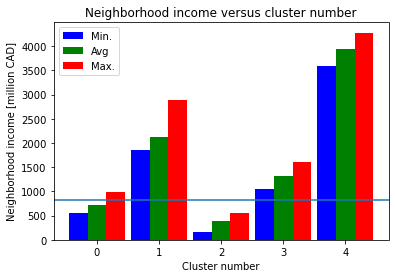

Average neighborhood income in Toronto:  816.5


In [42]:
# plot neighborhood income versus cluster number
N = 5
x = np.arange(N)
ax = plt.subplot(111)
i_min = ax.bar(x-0.3, min_cluster, width=0.3, color='b', align='center')
i_avg = ax.bar(x, avg_cluster, width=0.3, color='g', align='center')
i_max = ax.bar(x+0.3, max_cluster, width=0.3, color='r', align='center')
ax.legend((i_min[0], i_avg[0], i_max[0]), ('Min.', 'Avg', 'Max.') )
mean = neighborhoods["Neighborhood Income"].mean()/1000000
ax.axhline(mean)
plt.xlabel('Cluster number')
plt.ylabel('Neighborhood income [million CAD]')
plt.title('Neighborhood income versus cluster number')
plt.show()
print("Average neighborhood income in Toronto: ", round(mean, 1))

#### Clusters 0 and 2 are below average, it is recommended to concentrate on other clusters (potential customers have more free resources to spend)

#### Let's check Number of restaurants versus cluster number

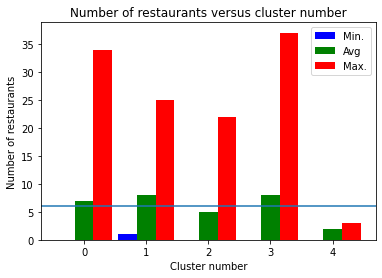

Average number of restaurants per neighborhood in Toronto:  6


In [43]:
az = plt.subplot(111)
n_min = az.bar(x-0.3, min_nb_cluster, width=0.3, color='b', align='center')
n_avg = az.bar(x, avg_nb_cluster, width=0.3, color='g', align='center')
n_max = az.bar(x+0.3, max_nb_cluster, width=0.3, color='r', align='center')
az.legend((n_min[0], n_avg[0], n_max[0]), ('Min.', 'Avg', 'Max.') )
mean_nb = int(round(neighborhoods["Number_of_restaurants"].mean(),0))
az.axhline(mean_nb)
plt.xlabel('Cluster number')
plt.ylabel('Number of restaurants')
plt.title('Number of restaurants versus cluster number')
plt.show()
print("Average number of restaurants per neighborhood in Toronto: ", mean_nb)

#### Clusters 0 to 3 are not far from average, cluster 5 is significantly below (lower number means less competition)

#### Let's check average neighborhood income per restaurant

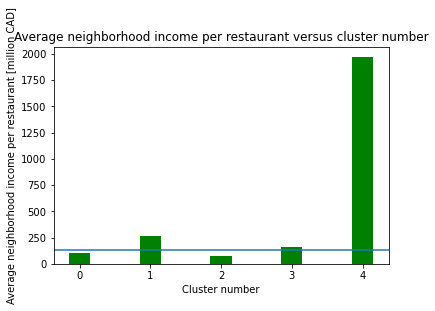

Average neighborhood income per restaurant in Toronto [million CAD]:  136.1


In [45]:
ay = plt.subplot(111)
inc_per_nb = []
for i in range(N):
    inc_per_nb.append(avg_cluster[i]/avg_nb_cluster[i])
a_avg = ay.bar(x, inc_per_nb, width=0.3, color='g', align='center')
ay.axhline(mean/mean_nb)
plt.xlabel('Cluster number')
plt.ylabel('Average neighborhood income per restaurant [million CAD]')
plt.title('Average neighborhood income per restaurant versus cluster number')
plt.show()
print("Average neighborhood income per restaurant in Toronto [million CAD]: ", round(mean/mean_nb, 1))

#### Clearly cluster 4 is far over average, so it is recommended to concentrate here.

#### Lets's check which neighborhoods are in cluster 4

In [46]:
neighborhoods_cluster_4

,Cluster Labels,Neighborhood,Neighbourhood Number,Population,Average income,Neighborhood Income,Longitude,Latitude,Number_of_restaurants
104,4,Rosedale-Moore Park,98,17285,207903,3593603355,-79.379669,43.68282,0
122,4,Waterfront Communities-The Island,77,60620,70600,4279772000,-79.377202,43.63388,3


#### There are only two neighborhoods in cluster 4: Rosedale-Moore Park and Waterfront Communities-The Island. <br>One of them, Rosedale-Moore Park has no restaurants at all, so it is the first choice. Looking at average income, it can be quite expensive place, so as the second choice it is recommended to check possibilities in Waterfront Communities-The Island.